In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
# font_path = '/content/drive/MyDrive/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)
# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

import os

#✅ 데이터셋 불러오기

In [ ]:
top_one_df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/datathon/주력_비주력상품 데이터/주력상품/one_time_buyers_all_events.parquet') # 주력상품 1회 구매고객 데이터

In [ ]:
top_multi_df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/datathon/주력_비주력상품 데이터/주력상품/multi_buyers_all_events.parquet') # 주력상품 2회 이상 구매고객 데이터

In [ ]:
notop_one_df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/datathon/주력_비주력상품 데이터/비주력상품/noTop3_one_time_buyers_all_events.parquet') # 비주력상품 1회 구매고객 데이터

In [ ]:
notop_multi_df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/datathon/주력_비주력상품 데이터/비주력상품/noTop3_multi_buyers_all_events.parquet') # 비주력상품 2회 이상 구매고객 데이터

# ✅데이터셋 전처리

In [ ]:
# # category_lvl3가 결측치인 경우 category_lvl2로 대체
top_one_df['category_lvl3'] = top_one_df['category_lvl3'].fillna(top_one_df['category_lvl2'])

# # category_lvl3가 결측치인 경우 category_lvl2로 대체
top_multi_df['category_lvl3'] = top_multi_df['category_lvl3'].fillna(top_multi_df['category_lvl2'])

# category_lvl3가 결측치인 경우 category_lvl2로 대체
notop_one_df['category_lvl3'] = notop_one_df['category_lvl3'].fillna(notop_one_df['category_lvl2'])

# category_lvl3가 결측치인 경우 category_lvl2로 대체
notop_multi_df['category_lvl3'] = notop_multi_df['category_lvl3'].fillna(notop_multi_df['category_lvl2'])

# 📦 EDA 통합

## 📈 주력상품 EDA

## 🧾 통합

### 🔎 평균 cart 보유 시간 비교(수치 확인)
- 다회 구매자->2회 이상 구매자, 1회/2회 이상 구매자 그래프 색상 통일

In [ ]:
df = top_multi_df  # 다회 구매자용 전체 데이터

# 1. event_datetime 생성 (vectorized 방식)
df['event_datetime'] = pd.to_datetime(df['event_date']) + pd.to_timedelta(df['event_hour'], unit='h')

# 2. cart & purchase 이벤트 필터링
df_cart = df[df['event_type'] == 'cart']
df_purchase = df[df['event_type'] == 'purchase']

# 3. 세션별 가장 빠른 cart/purchase 시간 추출
cart_times = df_cart.groupby('user_session')['event_datetime'].min().to_frame(name='cart_time')
purchase_times = df_purchase.groupby('user_session')['event_datetime'].min().to_frame(name='purchase_time')

# 4. 공통 세션만 남기고 merge
merged = pd.merge(cart_times, purchase_times, left_index=True, right_index=True)

# 5. 시간차 계산
cart_hold_time = (merged['purchase_time'] - merged['cart_time']).dt.total_seconds() / 3600

# 6. 음수 제거 (올바른 순서만 필터링)
cart_hold_time = cart_hold_time[cart_hold_time >= 0]

# 7. 결과 출력
print(f"[다회 구매자] 평균 Cart 보유 시간 (시간): {cart_hold_time.mean():.2f}")

[다회 구매자] 평균 Cart 보유 시간 (시간): 1.46


In [ ]:
cart_hold_time_multi = cart_hold_time # 다회 구매자

In [ ]:
df = top_one_df  # 1회 구매자용 전체 데이터

# 1. event_datetime 생성 (vectorized 방식)
df['event_datetime'] = pd.to_datetime(df['event_date']) + pd.to_timedelta(df['event_hour'], unit='h')

# 2. cart & purchase 이벤트 필터링
df_cart = df[df['event_type'] == 'cart']
df_purchase = df[df['event_type'] == 'purchase']

# 3. 세션별 가장 빠른 cart/purchase 시간 추출
cart_times = df_cart.groupby('user_session')['event_datetime'].min().to_frame(name='cart_time')
purchase_times = df_purchase.groupby('user_session')['event_datetime'].min().to_frame(name='purchase_time')

# 4. 공통 세션만 남기고 merge
merged = pd.merge(cart_times, purchase_times, left_index=True, right_index=True)

# 5. 시간차 계산
cart_hold_time = (merged['purchase_time'] - merged['cart_time']).dt.total_seconds() / 3600

# 6. 음수 제거 (올바른 순서만 필터링)
cart_hold_time = cart_hold_time[cart_hold_time >= 0]

# 7. 결과 출력
print(f"[1회 구매자] 평균 Cart 보유 시간 (시간): {cart_hold_time.mean():.2f}")

[1회 구매자] 평균 Cart 보유 시간 (시간): 2.56


In [ ]:
cart_hold_time_one_time = cart_hold_time #1회 구매자

### 🔎 평균 cart 보유 시간 비교(막대 그래프)

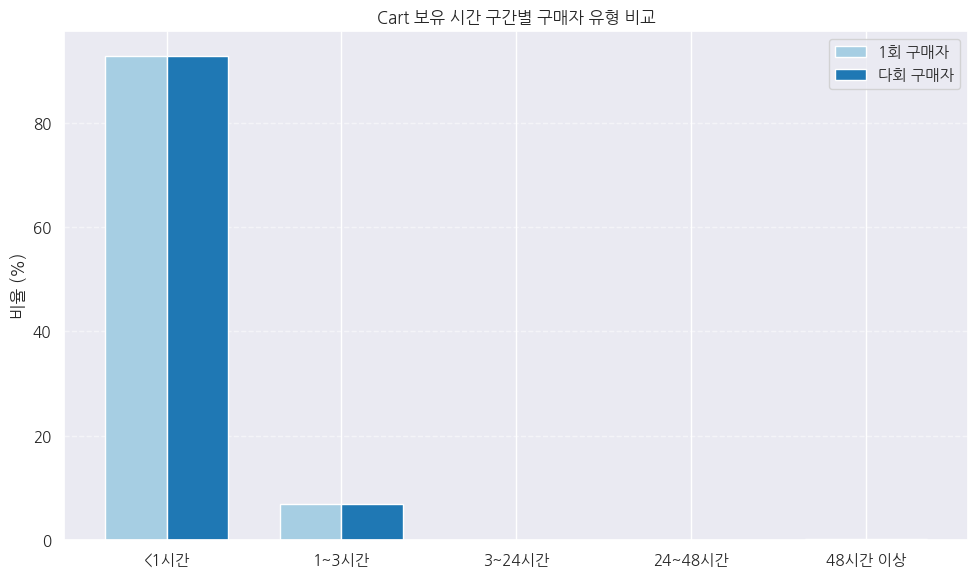

In [ ]:
# 구간 정의
bins = [0, 1, 3, 24, 48, 9999]
labels = ['<1시간', '1~3시간', '3~24시간', '24~48시간', '48시간 이상']

# 카테고리 라벨링
one_time_cut = pd.cut(cart_hold_time_one_time, bins=bins, labels=labels, right=False)
multi_cut = pd.cut(cart_hold_time_multi, bins=bins, labels=labels, right=False)

# 비율 계산
one_time_ratio = one_time_cut.value_counts(normalize=True).sort_index()
multi_ratio = multi_cut.value_counts(normalize=True).sort_index()

# 그룹형 막대그래프
import numpy as np

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, one_time_ratio.values * 100, width, label='1회 구매자', color='#a6cee3')
plt.bar(x + width/2, multi_ratio.values * 100, width, label='2회 이상 구매자', color='#1f78b4')

plt.xticks(x, labels)
plt.ylabel('비율 (%)')
plt.title('Cart 보유 시간 구간별 구매자 유형 비교')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 🔎 평균 cart 보유 시간 1시간 이상 비율 확인

In [ ]:
# 1시간 이상 보유한 경우만 필터링
one_time_over1h = cart_hold_time_one_time[cart_hold_time_one_time >= 1]
multi_over1h = cart_hold_time_multi[cart_hold_time_multi >= 1]

print(f"[1회 구매자] 1시간 이상 보유 비율: {len(one_time_over1h) / len(cart_hold_time_one_time) * 100:.2f}%")
print(f"[다회 구매자] 1시간 이상 보유 비율: {len(multi_over1h) / len(cart_hold_time_multi) * 100:.2f}%")

[1회 구매자] 1시간 이상 보유 비율: 7.10%
[다회 구매자] 1시간 이상 보유 비율: 3.93%


### 🔎 평균 cart 보유 시간 1시간 이상 분포(막대 그래프)

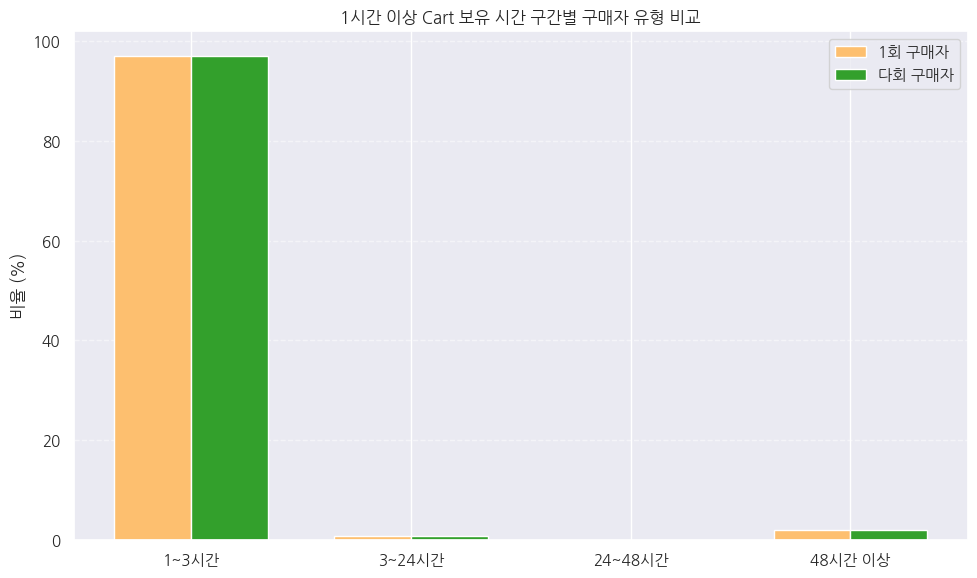

In [ ]:
# 1시간 이상만 다루므로 bins 조정
bins_1hplus = [1, 3, 24, 48, 9999]
labels_1hplus = ['1~3시간', '3~24시간', '24~48시간', '48시간 이상']

# cut
one_time_cut_1hplus = pd.cut(one_time_over1h, bins=bins_1hplus, labels=labels_1hplus, right=False)
multi_cut_1hplus = pd.cut(multi_over1h, bins=bins_1hplus, labels=labels_1hplus, right=False)

# 비율
one_time_ratio_1hplus = one_time_cut_1hplus.value_counts(normalize=True).sort_index()
multi_ratio_1hplus = multi_cut_1hplus.value_counts(normalize=True).sort_index()

x = np.arange(len(labels_1hplus))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, one_time_ratio_1hplus.values * 100, width, label='1회 구매자', color='#a6cee3')
plt.bar(x + width/2, multi_ratio_1hplus.values * 100, width, label='2회 이상 구매자', color='#1f78b4')

plt.xticks(x, labels_1hplus)
plt.ylabel('비율 (%)')
plt.title('1시간 이상 Cart 보유 시간 구간별 구매자 유형 비교')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 📈 비주력상품 EDA

## 🧾 통합

### 🔎 평균 cart 보유 시간 비교(수치 확인)

In [ ]:
df = notop_one_df  # 1회 구매자용 전체 데이터

# 1. event_datetime 생성 (vectorized 방식)
df['event_datetime'] = pd.to_datetime(df['event_date']) + pd.to_timedelta(df['event_hour'], unit='h')

# 2. cart & purchase 이벤트 필터링
df_cart = df[df['event_type'] == 'cart']
df_purchase = df[df['event_type'] == 'purchase']

# 3. 세션별 가장 빠른 cart/purchase 시간 추출
cart_times = df_cart.groupby('user_session')['event_datetime'].min().to_frame(name='cart_time')
purchase_times = df_purchase.groupby('user_session')['event_datetime'].min().to_frame(name='purchase_time')

# 4. 공통 세션만 남기고 merge
merged = pd.merge(cart_times, purchase_times, left_index=True, right_index=True)

# 5. 시간차 계산
cart_hold_time = (merged['purchase_time'] - merged['cart_time']).dt.total_seconds() / 3600

# 6. 음수 제거 (올바른 순서만 필터링)
cart_hold_time = cart_hold_time[cart_hold_time >= 0]

# 7. 결과 출력
print(f"[1회 구매자] 평균 Cart 보유 시간 (시간): {cart_hold_time.mean():.2f}")

[1회 구매자] 평균 Cart 보유 시간 (시간): 1.42


In [ ]:
cart_hold_time_one_time = cart_hold_time #1회 구매자

In [ ]:
df = notop_multi_df  # 다회 구매자용 전체 데이터

# 1. event_datetime 생성 (vectorized 방식)
df['event_datetime'] = pd.to_datetime(df['event_date']) + pd.to_timedelta(df['event_hour'], unit='h')

# 2. cart & purchase 이벤트 필터링
df_cart = df[df['event_type'] == 'cart']
df_purchase = df[df['event_type'] == 'purchase']

# 3. 세션별 가장 빠른 cart/purchase 시간 추출
cart_times = df_cart.groupby('user_session')['event_datetime'].min().to_frame(name='cart_time')
purchase_times = df_purchase.groupby('user_session')['event_datetime'].min().to_frame(name='purchase_time')

# 4. 공통 세션만 남기고 merge
merged = pd.merge(cart_times, purchase_times, left_index=True, right_index=True)

# 5. 시간차 계산
cart_hold_time = (merged['purchase_time'] - merged['cart_time']).dt.total_seconds() / 3600

# 6. 음수 제거 (올바른 순서만 필터링)
cart_hold_time = cart_hold_time[cart_hold_time >= 0]

# 7. 결과 출력
print(f"[다회 구매자] 평균 Cart 보유 시간 (시간): {cart_hold_time.mean():.2f}")

[다회 구매자] 평균 Cart 보유 시간 (시간): 0.80


In [ ]:
cart_hold_time_multi = cart_hold_time # 다회 구매자

### 🔎 평균 cart 보유 시간 비교(막대 그래프)

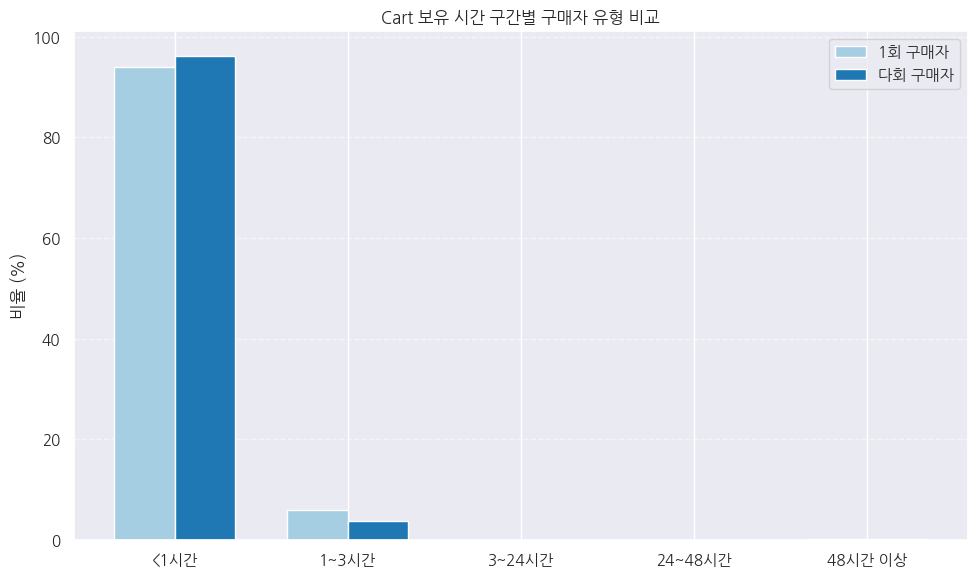

In [ ]:
# 구간 정의
bins = [0, 1, 3, 24, 48, 9999]
labels = ['<1시간', '1~3시간', '3~24시간', '24~48시간', '48시간 이상']

# 카테고리 라벨링
one_time_cut = pd.cut(cart_hold_time_one_time, bins=bins, labels=labels, right=False)
multi_cut = pd.cut(cart_hold_time_multi, bins=bins, labels=labels, right=False)

# 비율 계산
one_time_ratio = one_time_cut.value_counts(normalize=True).sort_index()
multi_ratio = multi_cut.value_counts(normalize=True).sort_index()

# 그룹형 막대그래프
import numpy as np

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, one_time_ratio.values * 100, width, label='1회 구매자', color='#a6cee3')
plt.bar(x + width/2, multi_ratio.values * 100, width, label='2회 이상 구매자', color='#1f78b4')

plt.xticks(x, labels)
plt.ylabel('비율 (%)')
plt.title('Cart 보유 시간 구간별 구매자 유형 비교')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 🔎 평균 cart 보유 시간 1시간 이상 비율 확인

In [ ]:
# 1시간 이상 보유한 경우만 필터링
one_time_over1h = cart_hold_time_one_time[cart_hold_time_one_time >= 1]
multi_over1h = cart_hold_time_multi[cart_hold_time_multi >= 1]

print(f"[1회 구매자] 1시간 이상 보유 비율: {len(one_time_over1h) / len(cart_hold_time_one_time) * 100:.2f}%")
print(f"[다회 구매자] 1시간 이상 보유 비율: {len(multi_over1h) / len(cart_hold_time_multi) * 100:.2f}%")

[1회 구매자] 1시간 이상 보유 비율: 5.98%
[다회 구매자] 1시간 이상 보유 비율: 3.73%


### 🔎 평균 cart 보유 시간 1시간 이상 분포(막대 그래프)

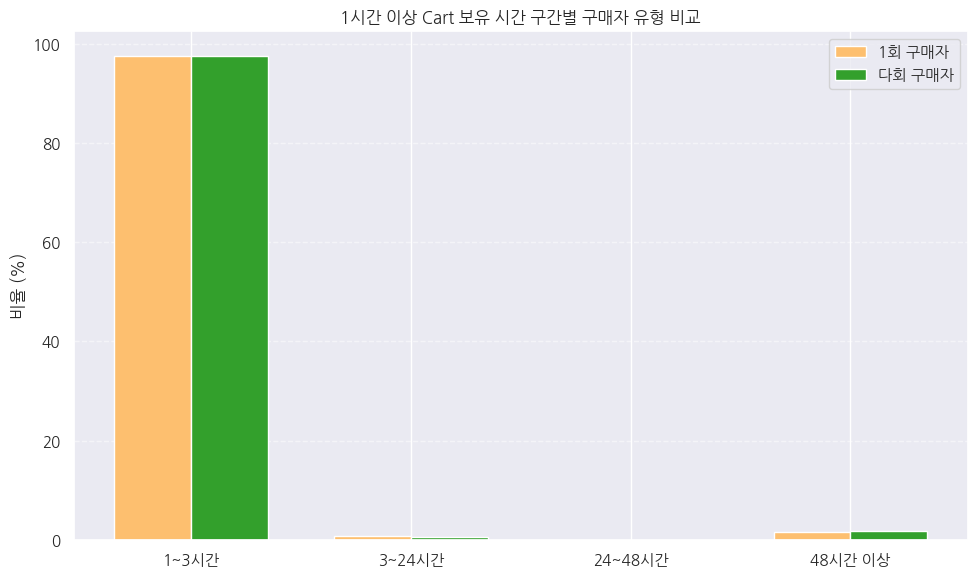

In [ ]:
# 1시간 이상만 다루므로 bins 조정
bins_1hplus = [1, 3, 24, 48, 9999]
labels_1hplus = ['1~3시간', '3~24시간', '24~48시간', '48시간 이상']

# cut
one_time_cut_1hplus = pd.cut(one_time_over1h, bins=bins_1hplus, labels=labels_1hplus, right=False)
multi_cut_1hplus = pd.cut(multi_over1h, bins=bins_1hplus, labels=labels_1hplus, right=False)

# 비율
one_time_ratio_1hplus = one_time_cut_1hplus.value_counts(normalize=True).sort_index()
multi_ratio_1hplus = multi_cut_1hplus.value_counts(normalize=True).sort_index()

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(labels_1hplus))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, one_time_ratio_1hplus.values * 100, width, label='1회 구매자', color='#a6cee3')
plt.bar(x + width/2, multi_ratio_1hplus.values * 100, width, label='2회 이상 구매자', color='#1f78b4')

plt.xticks(x, labels_1hplus)
plt.ylabel('비율 (%)')
plt.title('1시간 이상 Cart 보유 시간 구간별 구매자 유형 비교')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()